In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('/Volumes/Lab/Users/bhofflic/cell_classification/src/')
import cell_display_lib as cdl
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
scratch_file_root = '/Volumes/Scratch/Users/bhofflic/celltable_runs' # replace my name!
corr_analysis_path = '/Volumes/Scratch/Users/bhofflic/cell_correlations/'

pieces = [
    # '2005-04-14-0', #9.8*
    # '2005-04-26-1', #20.7*
    '2005-07-07-2', #7.8*
    # '2015-09-23-7', #40.6*
    # '2016-02-17-1', #29.1*
    # '2016-02-17-6', #28.0*
    # '2016-02-17-8', #48.6*
    # '2016-04-21-1', #33.8*
    # '2017-03-15-1', #21.1*
    # '2017-03-15-8', #12.3*
    # '2017-08-14-4', #14.3*
    # '2017-11-29-0', #33.0*
    # '2018-03-01-0', #98.3-
    # '2018-08-07-1', #26.1
    # '2018-08-07-11',#8.5*
    # '2018-08-07-2', #15.7*
    # '2018-08-07-5', #22.2*
    # '2018-08-07-9', #13.9*
]

In [48]:
tcs = np.array([tc.a.flatten() for tc in cts[piece_id].unit_table.query('run_id == "000" and valid == True').tc_all])
acfs = np.array([acf.a.flatten() for acf in cts[piece_id].unit_table.query('run_id == "000" and valid == True').acf])
labels = np.array([label for label in cts[piece_id].unit_table.query('run_id == "000" and valid == True').label_manual_text])
for i in range(len(tcs)):
    tcs[i] /= np.max(np.abs(tcs[i]))

In [8]:
cts[piece_id].dataset_table

run_id run_file_name    sorter  labels      piece_id  \
piece_id     run_id                                                        
2005-07-07-2 000       000       data000  kilosort  vision  2005-07-07-2   
             001       001       data001  kilosort  vision  2005-07-07-2   
             003       003       data003  kilosort  vision  2005-07-07-2   
             007       007       data007  kilosort  vision  2005-07-07-2   
             008       008       data008  kilosort  vision  2005-07-07-2   
             009       009       data009  kilosort  vision  2005-07-07-2   
             com       com                kilosort    list  2005-07-07-2   

                                                                  path note  \
piece_id     run_id                                                           
2005-07-07-2 000     /Volumes/Analysis/2005-07-07-2/kilosort_data00...        
             001     /Volumes/Analysis/2005-07-07-2/kilosort_data00...        
             003     /Volumes/Analysis/2005-07-07-2/kilosort_data00...        
             007     /Volumes/Analysis/2005-07-07-2/kilosort_data00...        
             008     /Volumes/Analysis/2005-07-07-2/kilosort_data00...        
             009     /Volumes/Analysis/2005-07-07-2/kilosort_data00...        
             com                                                              

                                                       label_data_path  \
piece_id     run_id                                                      
2005-07-07-2 000                                                         
             001                                                         
             003                                                         
             007                                                         
             008                                                         
             009                                                         
             com     /Volumes/Scratch/Users/alexth/supersample-stas...   

                                                              sta_path  \
piece_id     run_id                                                      
2005-07-07-2 000     /Volumes/Scratch/Users/alexth/supersample-stas...   
             001     /Volumes/Scratch/Users/alexth/supersample-stas...   
             003     /Volumes/Scratch/Users/alexth/supersample-stas...   
             007     /Volumes/Scratch/Users/alexth/supersample-stas...   
             008     /Volumes/Scratch/Users/alexth/supersample-stas...   
             009     /Volumes/Scratch/Users/alexth/supersample-stas...   
             com                                                         

                                                               ei_path  ...  \
piece_id     run_id                                                     ...   
2005-07-07-2 000     /Volumes/Scratch/Users/alexth/supersample-stas...  ...   
             001     /Volumes/Scratch/Users/alexth/supersample-stas...  ...   
             003     /Volumes/Scratch/Users/alexth/supersample-stas...  ...   
             007     /Volumes/Scratch/Users/alexth/supersample-stas...  ...   
             008     /Volumes/Scratch/Users/alexth/supersample-stas...  ...   
             009     /Volumes/Scratch/Users/alexth/supersample-stas...  ...   
             com                                                        ...   

                     rf_radii radii_ids rf_overlaps rf_area_overlaps  \
piece_id     run_id                                                    
2005-07-07-2 000     a386x386      a386    a386x386         a386x386   
             001     a447x447      a447    a447x447         a447x447   
             003     a363x363      a363    a363x363         a363x363   
             007     a253x253      a253    a253x253         a253x253   
             008     a293x293      a293    a293x293         a293x293   
             009     a261x261      a261    a261x261         a261x261   
 

/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


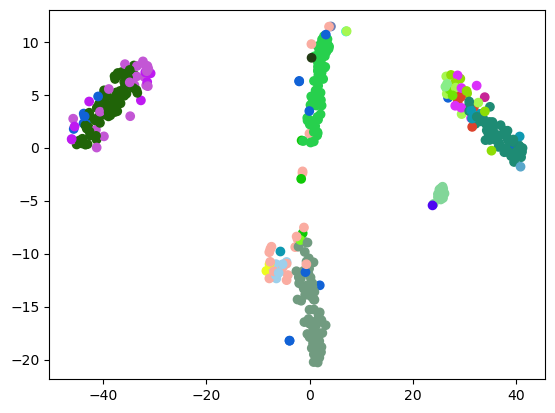

In [63]:
#Run PCA on tcs
from sklearn.decomposition import PCA
import random
pca = PCA(n_components=4)
pca.fit(tcs)
tcs_pca = pca.transform(tcs)
acf_pca = PCA(n_components=4)
acf_pca.fit(acfs)
acfs_pca = acf_pca.transform(acfs)

#assign colors to labels
def generate_unique_color():
    return (random.random(), random.random(), random.random())
label_colors = {label: generate_unique_color() for label in np.unique(labels)}
color_labels = [label_colors[label] for label in labels]

#Plot TSNE on concatenated tcs and acfs
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tcs_acfs_tsne = tsne.fit_transform(np.concatenate([tcs_pca, acfs_pca], axis=1))
plt.scatter(tcs_acfs_tsne[:,0], tcs_acfs_tsne[:,1], c=color_labels)

In [3]:
cts = {}

for piece_id in tqdm(pieces):
    ct = cdl.CellTable()
    ct.file_load_pieces(scratch_file_root, [piece_id])
    cts[piece_id] = ct

  0%|          | 0/1 [00:00<?, ?it/s]

~ Welcome to the CellTable ~experience~
~ 
~ Starting a fresh new CellTable
~ Loading 1 pieces from /Volumes/Scratch/Users/bhofflic/celltable_runs: ['2005-07-07-2']
*** timer  started
Loading piece 2005-07-07-2
~ Successfully loaded piece 2005-07-07-2
*** elapsed 8s of 8s = 0.1m elapsed, of 0.1m estimated (1/1) (0.1 / sec)
~ Processing labels (replace nan, update label encoder and unique names)
Copying cell labels to units
combined mode


100%|██████████| 1/1 [00:09<00:00,  9.07s/it]

~ Done loading, time to analyze.


In [5]:
import features_correlations as feat_c
import feature_lists

for ct in cts.values():
    
    features_to_generate_by_dataset = []
    features_to_generate_by_dataset.extend(feature_lists.features_standard_correlation)

    features_to_generate_by_dataset.extend([
        
        # feat_v.Feature_load_sta,
    #     feat_v.Feature_detect_grayscale_STA,
        # feat_v.Feature_sta_basic,
    #     feat_v.Feature_sigstix,
        # feat_v.Feature_primary_colors,
    #     feat_v.Feature_timecourses,
        # feat_v.Feature_rf_map,
    #     feat_v.Feature_center_of_mass,
    #     feat_v.Feature_rf_advanced_properties,
    #     # feat_v.Feature_rf_histogram,
    #     feat_v.Feature_edge_detection,
    # feat_v.Feature_rf_convex_hull,
    # feat_v.Feature_rf_centers,

    #
    #     # feat_e.Feature_ei_correlation_data,
        # feat_e.Feature_load_spike_times,
    #     feat_e.Feature_ei_select_electrodes, feat_e.Feature_ei_map,
    #     # feat_e.Feature_ei_profile,
        # feat_e.Feature_spike_waveform,
        # feat_c.Feature_cross_correlations_complete_fast,
    ])

    # features_to_generate_by_dataset.extend(feature_lists.features_standard_visual)
    # features_to_generate_by_dataset.extend(feature_lists.features_standard_electrical)

    features_to_generate_overall = []
    # features_to_generate_overall = [feat.Feature_process_manual_labels]
    runs = ct.dataset_table['run_id'].unique()[0]
    print(runs)
    indices = ct.unit_table.query(f"run_id in @runs").index
    # indices = 'all'
    ct.generate_features(indices, features_to_generate_by_dataset,
                        features_to_generate_overall,
                        force_features=1,
                        load_analysis_data=1)
        
    ct.copy_cell_labels_to_units()

000
~ Activating per-dataset features ["<class 'features_correlations.Feature_rf_radii'>", "<class 'features_correlations.Feature_rf_overlaps'>", "<class 'features_correlations.Feature_cross_correlations_complete_fast'>"]
*** timer  started
~ 

Generating features for dataset ('2005-07-07-2', '000'), 1 of 1
Loading vision data (thanks Eric), using load_sta False, load_labels True, load_ei False, load_long_ei True
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_x', 'hull_center_y', 'rf_convex_hull'}}
Generating Params


100%|██████████| 386/386 [00:04<00:00, 88.04it/s]

Calculating Radii



100%|██████████| 386/386 [00:01<00:00, 292.85it/s]
/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


~ ... feature complete. unit_table has 2936 (2003 valid) entries, with 51 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'rf_area_overlaps', 'rf_overlaps', 'rf_inner_products', 'overlap_ids'}}, requires {'unit': {'map_sig_stixels', 'map_sta_peak'}, 'dataset': {'radii_ids', 'rf_radii'}}
Generating Params


100%|██████████| 386/386 [00:20<00:00, 18.47it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 386/386 [00:03<00:00, 117.31it/s]


~ ... feature complete. unit_table has 2936 (2003 valid) entries, with 51 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_ids', 'cch_1ms', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1  ] s


100%|██████████| 101/101 [00:39<00:00,  2.53it/s]


~ ... feature complete. unit_table has 2936 (2003 valid) entries, with 51 columns
*** elapsed 82s of 82s = 1.4m elapsed, of 1.4m estimated (1/1) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
*** elapsed 0s of 82s = 1.4m elapsed
~ no overall features are enabled
*** elapsed 0s of 82s = 1.4m elapsed
~ 
All done generating features! Congrats & be well
Copying cell manual labels to units


100%|█| 573/573 [00:04<00:00, 123.39it/s

done


In [52]:
ctypes = ['ON parasol', 'OFF parasol', 'ON midget', 'OFF midget', 'ON smooth', 'OFF smooth', 'SBC', 'OFF broad thorny', 'ON A1', 'OFF A1', 'OFF blobby amacrine', 'OFF boring 1', 'OFF boring 2', 'OFF boring 3']
cch_properties_dict = {
            'piece_id': [],
            'run_id': [],
            'unit_id': [],
            'cell_dists': [],
            'cell_area_overlaps': [],
            'cell_overlaps': [],
            'cch_1ms': [],
            'cch_10ms': [],
            'cch_delays': [],
            'cell_type': []
}
for ct in cts.values():
    ctype_piece_runs = {}
    for ctype in ctypes:
        max_run = ('',0)
        for run_id in ct.dataset_table.run_id.unique():
            units = ct.unit_table.query("label_manual_text == @ctype and run_id == @run_id and valid == True")
            if len(units) > max_run[1]:
                max_run = (run_id, len(units))
        ctype_piece_runs[ctype] = max_run
    ctype_piece_runs_unique = {}
    for ctype in ctypes:
        run = ctype_piece_runs[ctype][0]
        if run not in ctype_piece_runs_unique:
            ctype_piece_runs_unique[run] = []
        ctype_piece_runs_unique[run].append(ctype)
    runs = set(ctype_piece_runs_unique.keys())
    runs.discard('')
    runs = list(runs)
    for run in runs:
        valid = ct.unit_table.query('valid == True and run_id == @run')
        cch_delays = list(valid.iloc[0]['CCH_delays'].a.values())[0]
        cell_dists = np.zeros((len(valid), len(valid)))
        cell_area_overlaps = np.zeros((len(valid), len(valid)))
        cell_overlaps = np.zeros((len(valid), len(valid)))
        cch_1ms = np.zeros((len(valid), len(valid), len(cch_delays)))
        cch_10ms = np.zeros((len(valid), len(valid), len(cch_delays)))
        cell_types = np.empty(len(valid), dtype=object)
        for i, (uid, cell) in enumerate(valid.iterrows()):
            cell_dists[i, :] = np.array(list(cell.rf_overlaps.a.values()))
            cell_area_overlaps[i, :] = np.array(list(cell.rf_area_overlaps.a.values()))
            cell_overlaps[i, :] = np.array(list(cell.rf_inner_products.a.values()))
            cell_types[i] = cell.label_manual_text
            cch_1ms[i, :, :] = np.array(list(cell['1ms CCHs'].a.values()))
            cch_10ms[i, :, :] = np.array(list(cell['10ms CCHs'].a.values()))
        cch_properties_dict['piece_id'].extend([ct.dataset_table.piece_id[0]] * len(valid))
        cch_properties_dict['run_id'].extend([run] * len(valid))
        cch_properties_dict['unit_id'].extend(valid.index.values)
        cch_properties_dict['cell_dists'].extend(cell_dists)
        cch_properties_dict['cell_area_overlaps'].extend([cell_area_overlaps[i, :] for i in range(len(valid))])
        cch_properties_dict['cell_overlaps'].extend([cell_overlaps[i, :] for i in range(len(valid))])
        cch_properties_dict['cch_1ms'].extend([cch_1ms[i, :, :] for i in range(len(valid))])
        cch_properties_dict['cch_10ms'].extend([cch_10ms[i, :, :] for i in range(len(valid))])
        cch_properties_dict['cch_delays'].extend([cch_delays for _ in range(len(valid))])
        cch_properties_dict['cell_type'].extend(cell_types)

In [58]:
idx = ct.dataset_table.index[0]
ct.dataset_table.at[idx, 'run_id']

'000'

In [53]:
data = pd.DataFrame(cch_properties_dict)

In [26]:
valid = ct.unit_table.query('valid == True and run_id == "000"')

In [27]:
cch_delays = np.array(list(valid.iloc[0]['CCH_delays'].a))
cell_dists = np.zeros((len(valid), len(valid)))
cell_area_overlaps = np.zeros((len(valid), len(valid)))
cell_overlaps = np.zeros((len(valid), len(valid)))
cch_1ms = np.zeros((len(valid), len(valid), len(cch_delays)))
cch_10ms = np.zeros((len(valid), len(valid), len(cch_delays)))
cell_types = np.empty(len(valid), dtype=object)
for i, (uid, cell) in enumerate(valid.iterrows()):
    cell_dists[i, :] = np.array(list(cell.rf_overlaps.a.values()))
    cell_area_overlaps[i, :] = np.array(list(cell.rf_area_overlaps.a.values()))
    cell_overlaps[i, :] = np.array(list(cell.rf_inner_products.a.values()))
    cell_types[i] = cell.label_manual_text
    cch_1ms[i, :, :] = np.array(list(cell['1ms CCHs'].a.values()))
    cch_10ms[i, :, :] = np.array(list(cell['10ms CCHs'].a.values()))

In [28]:
from scipy.io import savemat
cch_properties_dict = {
    'cell_dists': [cell_dists[i, :] for i in range(len(valid))],
    'cell_area_overlaps': [cell_area_overlaps[i, :] for i in range(len(valid))],
    'cell_overlaps': [cell_overlaps[i, :] for i in range(len(valid))],
    'cch_1ms': [cch_1ms[i, :, :] for i in range(len(valid))],
    'cch_10ms': [cch_10ms[i, :, :] for i in range(len(valid))],
    'cch_delays': [cch_delays for _ in range(len(valid))],
    'cell_types': cell_types
}
# Save the dictionary to a .mat file
# path ='/Volumes/Scratch/Users/bhofflic/cell_correlations/test/cch_properties.mat'
# savemat(path, cch_properties_dict)

(201,)


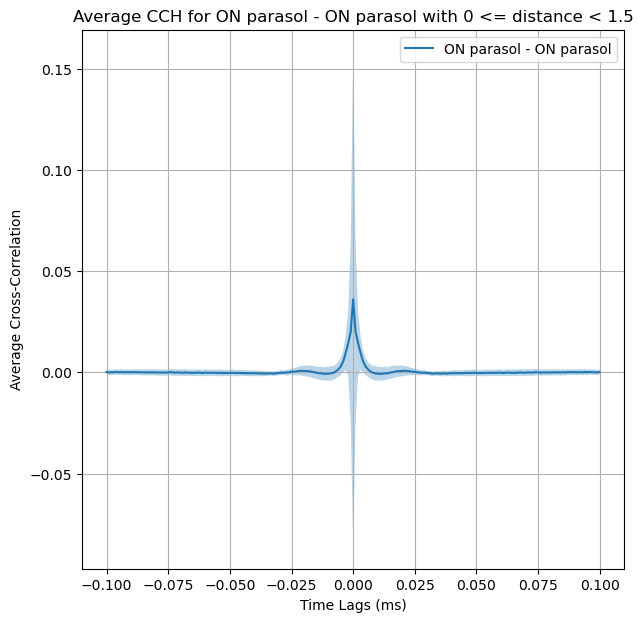

(201,)


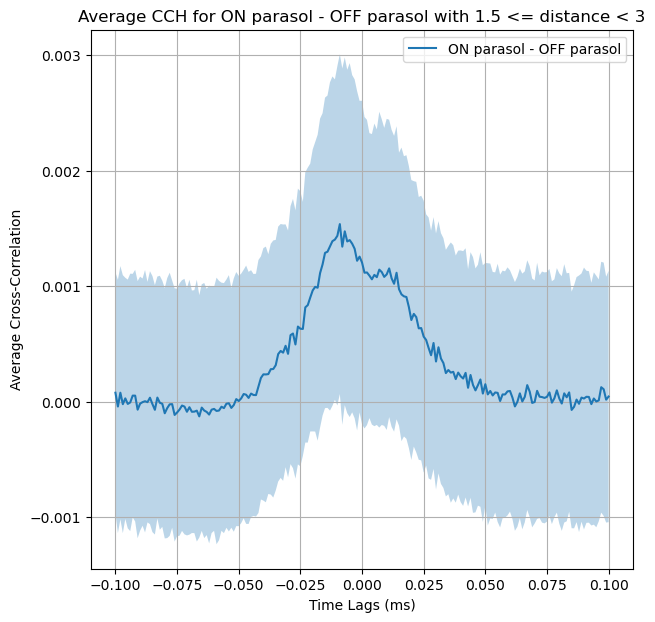

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the data
path ='/Volumes/Scratch/Users/bhofflic/cell_correlations/test/cch_properties.mat'
data = scipy.io.loadmat(path)

# Extract the necessary data
cell_dists = data['cell_dists']
cell_types = data['cell_types'].flatten()
cch_1ms = data['cch_1ms']
cch_delays = data['cch_delays'][0,:]

# Define the ruleout types
ruleout = ['BW', 'unlabel', 'weird', 'duplicate', 'unclass', 'contaminated', 'crap', 'edge', 'weak', 'mess', 'Unclass', 'artifact']

# Filter out the bad types from the cell_types
valid_cell_types = np.array([cell_type for cell_type in cell_types if cell_type not in ruleout])

# Create a mask to filter out invalid cells based on the ruleout list
valid_cells_mask = ~np.isin(cell_types, ruleout)

# Apply the mask to the cell distances and CCH data
valid_cell_dists = cell_dists[valid_cells_mask, :][:, valid_cells_mask]
valid_cch_1ms = cch_1ms[valid_cells_mask, :][:, valid_cells_mask]

# Function to get indices for a specific cell type
def get_indices_for_cell_type(cell_type, cell_types_array):
    return [i for i, ct in enumerate(cell_types_array) if ct == cell_type]

# Function to generate average CCH plot
def generate_average_cch_plot(cell_type_1, cell_type_2, dist_thresholds, cell_dists_array, cell_types_array, cch_data_array, show_std=True):
    indices_1 = get_indices_for_cell_type(cell_type_1, cell_types_array)
    indices_2 = get_indices_for_cell_type(cell_type_2, cell_types_array)

    valid_cch_values = []

    # Collect valid CCH values within the specified distance threshold
    for i in indices_1:
        for j in indices_2:
            if i != j and cell_dists_array[i, j] >= dist_thresholds[0] and cell_dists_array[i, j] < dist_thresholds[1]:
                valid_cch_values.append(cch_data_array[i, j])

    # If there are valid CCH values, calculate the average and plot
    if valid_cch_values:
        average_cch = np.mean(valid_cch_values, axis=0)
        print(average_cch.shape)
        plt.figure(figsize=(7, 7))
        plt.plot(cch_delays, average_cch, label=f'{cell_type_1} - {cell_type_2}')
        if show_std:
            std_cch = np.std(valid_cch_values, axis=0)
            plt.fill_between(cch_delays, average_cch - std_cch, average_cch + std_cch, alpha=0.3)
        plt.title(f'Average CCH for {cell_type_1} - {cell_type_2} with {dist_thresholds[0]} <= distance < {dist_thresholds[1]}')
        plt.xlabel('Time Lags (ms)')
        plt.ylabel('Average Cross-Correlation')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No valid CCH data found for the given cell types and distance threshold.")

# Example usage
generate_average_cch_plot('ON parasol', 'ON parasol', [0, 1.5], valid_cell_dists, valid_cell_types, valid_cch_1ms)
generate_average_cch_plot('ON parasol', 'OFF parasol', [1.5, 3], valid_cell_dists, valid_cell_types, valid_cch_1ms)
